In [6]:
## chi cuadrado
#prueba de chi-cuadado x^2
import numpy as np
import scipy as sp
import math
import scipy.stats as stats

def randu(X,P):
    r = []
    for i in range(P):
        X=(65539*X)%(2**31)
        
        r.append(float(X)/(2**31))
    return r

def gSinclair(X, P):
    r = []
    for i in range(P):
        X=(75*X)%((2**16)+1)
        r.append(float(X)/((2**16)+1))
    return r

def numericalReciepies(X,P):
    r = []
    for i in range(P):
        X=(1664525*X+1013904223)%(2**32)
        r.append(float(X)/2**32)
    return r
def borland(X,P):
    r = []
    for i in range(P):
        X=(22695477*X+1)%(2**32)
        r.append(float(X)/2**32)
    return r
def chiCuadrado(critico,canpart,secuencia=[]):
    
    longitudIntervalo = 1 / float(canpart) 
    frecuenciasObservadas = []           


    for i in range(0,canpart):
        frecuenciasObservadas.append(0)
        
    

   
    
    for i in range(len(secuencia)):
        cont = 1
        for j in range(0,canpart):     
            if secuencia[i] > (cont - 1) * longitudIntervalo and secuencia[i] <= cont * longitudIntervalo:
                frecuenciasObservadas[j] += 1
            cont += 1 
            
    #print("las frecuencias observadas:\n",frecuenciasObservadas)
        
    frecuenciaEsperada = len(secuencia) / float(canpart)
    chiCuadrado = 0.0
        
    for i in range(0,canpart):
        chiCuadrado += (frecuenciasObservadas[i] - frecuenciaEsperada)**2 / frecuenciaEsperada
    #print("valor final: ")
    chiCuadrado=round(chiCuadrado,4);
    print ("Prueba del simulador=",chiCuadrado)
    


    if(chiCuadrado<critico):
        print("Aceptada la hipotesis de uniformidad chi-cuadrado\n")
    
    else:
        print("Rechazada la hipotesis de uniformidad chi-cuadrado\n")



N=int(input("Ingrese la cantidad maxima de numeros a generar: "));
x0=float(input("Ingrese el valor de la semilla x0: "));
k = int(input("Introduzca el valor de k: ")) 
crit = stats.chi2.ppf(q = 0.95,df = k)
crit=round(crit,4)
print("Prueba chi-cuadrado con k=",k," y 95% = ",crit)
    
print("Generador Borland")
b=borland(x0, N)
chiCuadrado(crit,k,b)

print("Generador numericalReciepies")
re = numericalReciepies(x0, N)
chiCuadrado(crit,k,re)

print("Generador gSinclair")
s = gSinclair(x0, N)
chiCuadrado(crit,k,s)

print("Generador randu")
X = randu(x0, N)
chiCuadrado(crit,k,X)









Ingrese la cantidad maxima de numeros a generar: 50
Ingrese el valor de la semilla x0: 5
Introduzca el valor de k: 11
Prueba chi-cuadrado con k= 11  y 95% =  19.6751
Generador Borland
Prueba del simulador= 8.96
Aceptada la hipotesis de uniformidad chi-cuadrado

Generador numericalReciepies
Prueba del simulador= 5.44
Aceptada la hipotesis de uniformidad chi-cuadrado

Generador gSinclair
Prueba del simulador= 16.44
Aceptada la hipotesis de uniformidad chi-cuadrado

Generador randu
Prueba del simulador= 9.4
Aceptada la hipotesis de uniformidad chi-cuadrado



In [4]:
## Test de rachas
import numpy as np
import scipy as sp

import math

import scipy.stats as stats
def randu(X,P):
    r = []
    for i in range(P):
        X=(65539*X)%(2**31)
        
        r.append(float(X)/(2**31))
    return r

def gSinclair(X, P):
    r = []
    for i in range(P):
        X=(75*X)%((2**16)+1)
        r.append(float(X)/((2**16)+1))
    return r

def numericalReciepies(X,P):
    r = []
    for i in range(P):
        X=(1664525*X+1013904223)%(2**32)
        r.append(float(X)/2**32)
    return r
def borland(X,P):
    r = []
    for i in range(P):
        X=(22695477*X+1)%(2**32)
        r.append(float(X)/2**32)
    return r
def testRachas(x):
    tRacha=[]
    for i in range(len(x)-1):
        if x[i] > x[i+1]:
            tRacha.append(0)
        elif x[i] < x[i+1]:
            tRacha.append(1)
    R=1 
    for i in range(len(tRacha)-1):
        if tRacha[i]!=tRacha[i+1]: 
            R+=1
    print ("Las rachas son: ")
    print (R)
    
    Z = (R - (2*N-1)/float(3))/math.sqrt((16*N-29)/float(90))
    
    #print("Z=",Z)
    print ("|Z|= ")
    print (np.absolute(Z),"\n")
    z=np.absolute(Z)
    if(z<1.960):
        print("Aceptada la prueba de rachas\n")
    else:
        print("Rechazada la prueba de rachas\n")



N=int(input("Ingrese la cantidad maxima de numeros a generar: "));
x0=float(input("Ingrese el valor de la semilla x0: "));
print("Test de rachas")
    
print("Generador Borland")
b=borland(x0, N)
testRachas(b)

print("Generador numericalReciepies")
re = numericalReciepies(x0, N)
testRachas(re)

print("Generador gSinclair")
s = gSinclair(x0, N)
testRachas(s)

print("Generador randu")
X = randu(x0, N)
testRachas(X)


Ingrese la cantidad maxima de numeros a generar: 50
Ingrese el valor de la semilla x0: 5
Test de rachas
Generador Borland
Las rachas son: 
37
|Z|= 
1.366639777028183 

Aceptada la prueba de rachas

Generador numericalReciepies
Las rachas son: 
38
|Z|= 
1.708299721285229 

Aceptada la prueba de rachas

Generador gSinclair
Las rachas son: 
33
|Z|= 
0.0 

Aceptada la prueba de rachas

Generador randu
Las rachas son: 
28
|Z|= 
1.708299721285229 

Aceptada la prueba de rachas



Ingrese la cantidad maxima de numeros a generar: 50
Ingrese el valor de la semilla x0: 5
Pruebas de Kolmogorov-Smirnov
Generador Borland


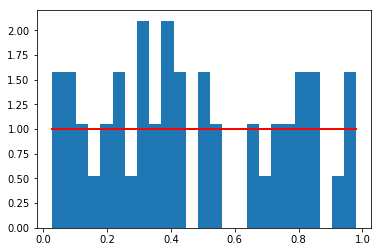

De =  0.2648548497555668


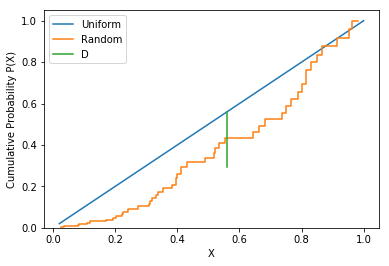

D =  0.26485484975556667
p-value =  0.0013838018617391762 

Generador numericalReciepies


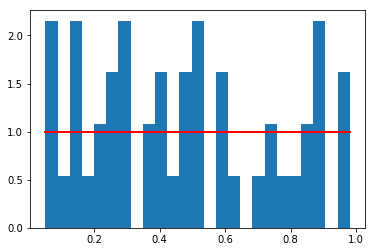

De =  0.2535990275873517


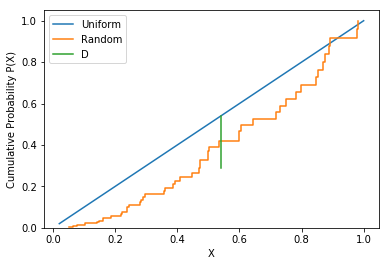

D =  0.2535990275873516
p-value =  0.00253957190489036 

Generador gSinclair


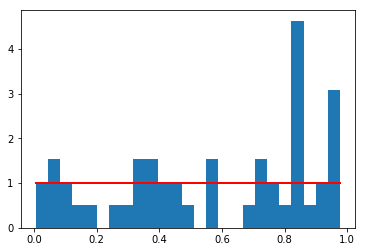

De =  0.23889467436147596


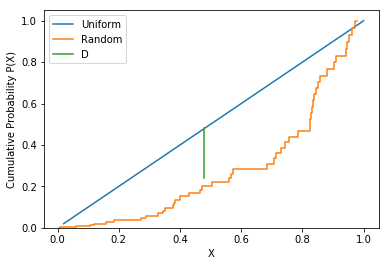

D =  0.2388946743614758
p-value =  0.005384944263030697 

Generador randu


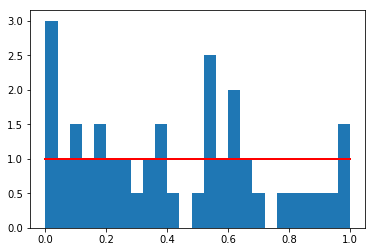

De =  0.30898680532111633


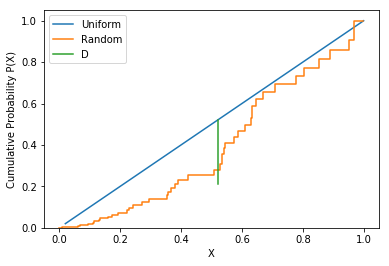

D =  0.3089868053211162
p-value =  9.760198992599925e-05 



In [7]:
## Prueba de Kolmogorov-Smirnov
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
def randu(X,P):
    r = []
    for i in range(P):
        X=(65539*X)%(2**31)
        
        r.append(float(X)/(2**31))
    return r

def gSinclair(X, P):
    r = []
    for i in range(P):
        X=(75*X)%((2**16)+1)
        r.append(float(X)/((2**16)+1))
    return r

def numericalReciepies(X,P):
    r = []
    for i in range(P):
        X=(1664525*X+1013904223)%(2**32)
        r.append(float(X)/2**32)
    return r
def borland(X,P):
    r = []
    for i in range(P):
        X=(22695477*X+1)%(2**32)
        r.append(float(X)/2**32)
    return r

def Kolmog(n,x):
    
    count, bins, ignored = plt.hist(x, 25, density=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()


    x1 = np.arange(1/N,1+1/N,1/N)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))
    
    De=np.absolute(y2-y1)
    print("De = ",np.max(De))

    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='D')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')
    plt.ylim(0, 1.05)
    plt.show()
    from scipy import stats
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue,"\n")
    

    



N=int(input("Ingrese la cantidad maxima de numeros a generar: "));
u = [1.0] * N;
x0=float(input("Ingrese el valor de la semilla x0: "));
print("Pruebas de Kolmogorov-Smirnov")
    
print("Generador Borland")
b=borland(x0, N)
Kolmog(N,b)

print("Generador numericalReciepies")
re = numericalReciepies(x0, N)
Kolmog(N,re)

print("Generador gSinclair")
s = gSinclair(x0, N)
Kolmog(N,s)

print("Generador randu")
X = randu(x0, N)
Kolmog(N,X)
